# Oasis Infobyte Internship Tasks

# Task 5 - SALES PREDICTION USING PYTHON

# Problem Statement 

to develop a predictive model that accurately estimates the quantity of a product that people are likely to buy. The model should take into account the following factors:

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

import pickle

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

# Loading Dataset

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#top 5 rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#bottom  5 rows
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


# Data Understanding

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [9]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
data.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [11]:
data.ndim

2

In [12]:
data.size

1000

In [13]:
data.shape

(200, 5)

In [14]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# Data Preprocessing

In [17]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
#delete Unnecessary column

In [19]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
# pd.set_option('display.max_rows',None)

In [21]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
data.duplicated().sum()

0

# Data Visualization

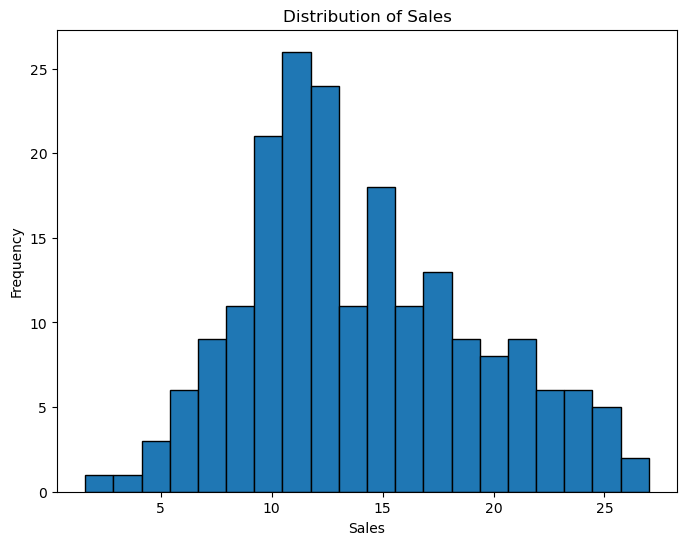

In [24]:
plt.figure(figsize=(8,6))
plt.hist(data['Sales'], bins=20, edgecolor='k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

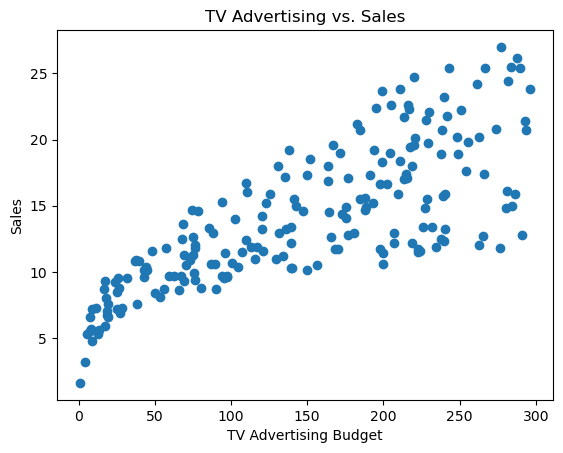

In [25]:
#TV vs Sales
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs. Sales')
plt.show()

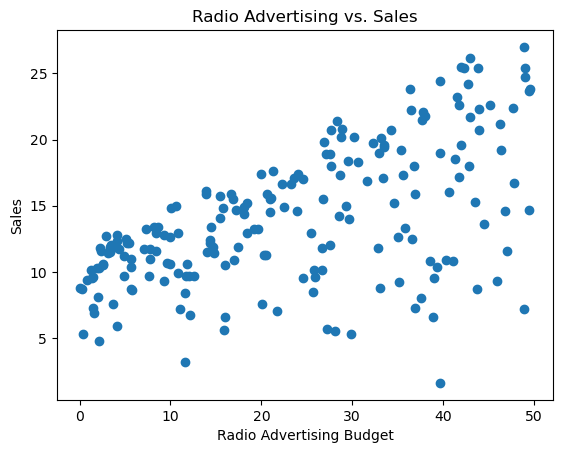

In [26]:
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Radio Advertising vs. Sales')
plt.show()

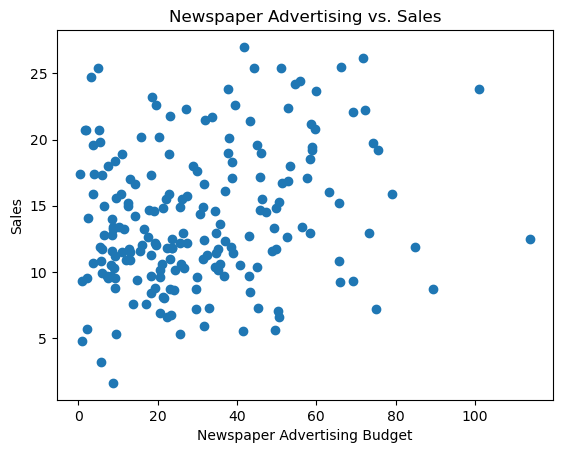

In [27]:
plt.scatter(data['Newspaper'], data['Sales'])
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.title('Newspaper Advertising vs. Sales')
plt.show()

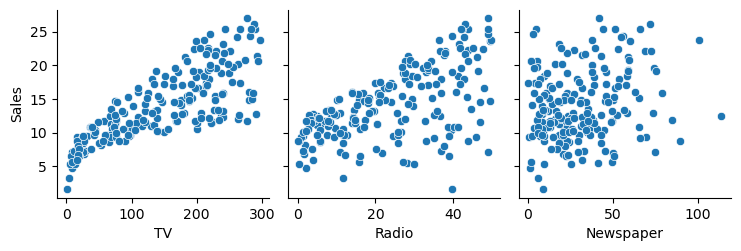

In [28]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',kind='scatter')
plt.show()

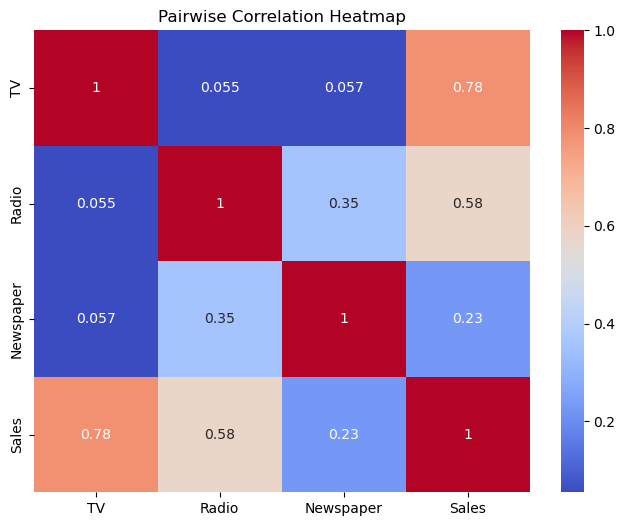

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap')
plt.show()

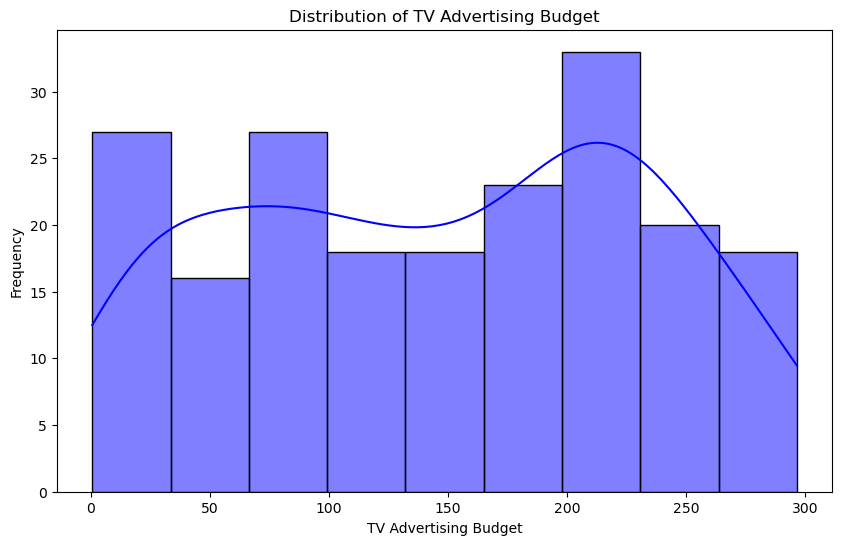

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TV'], kde=True, color='blue')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Frequency')
plt.title('Distribution of TV Advertising Budget')
plt.show()

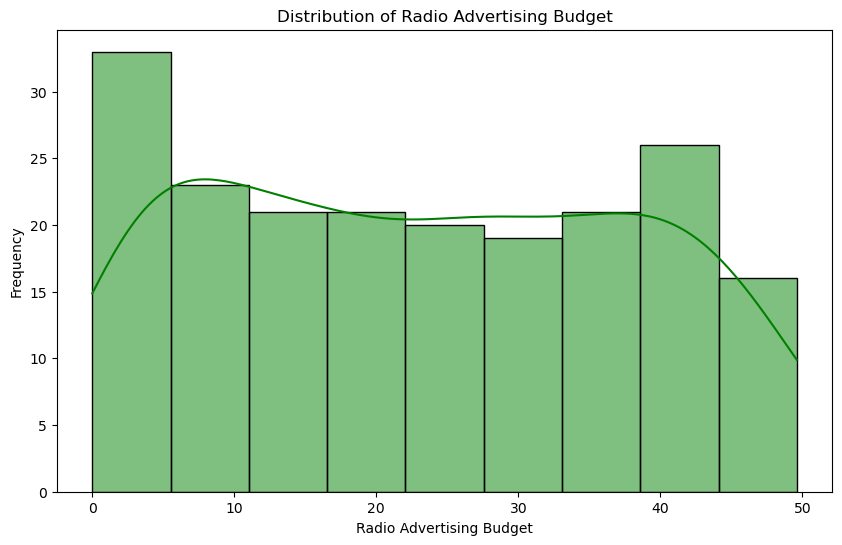

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Radio'], kde=True, color='green')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Radio Advertising Budget')
plt.show()

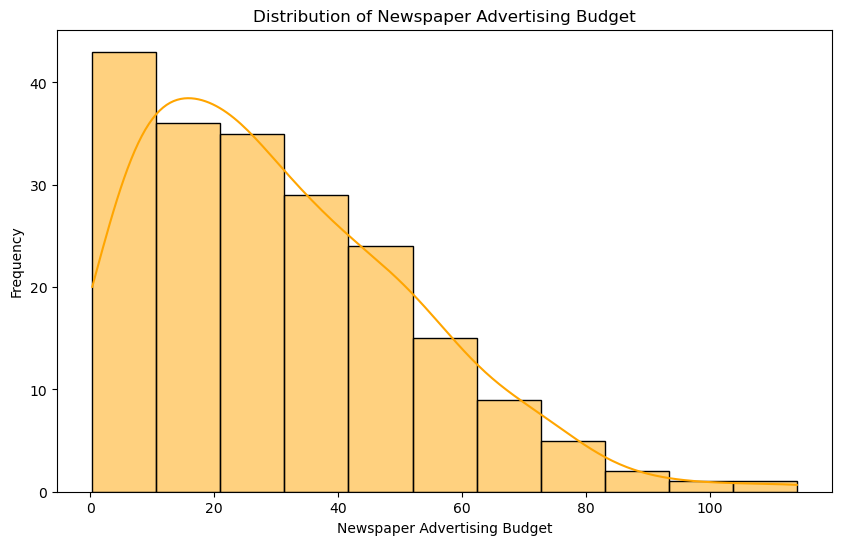

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Newspaper'], kde=True, color='orange')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Newspaper Advertising Budget')
plt.show()

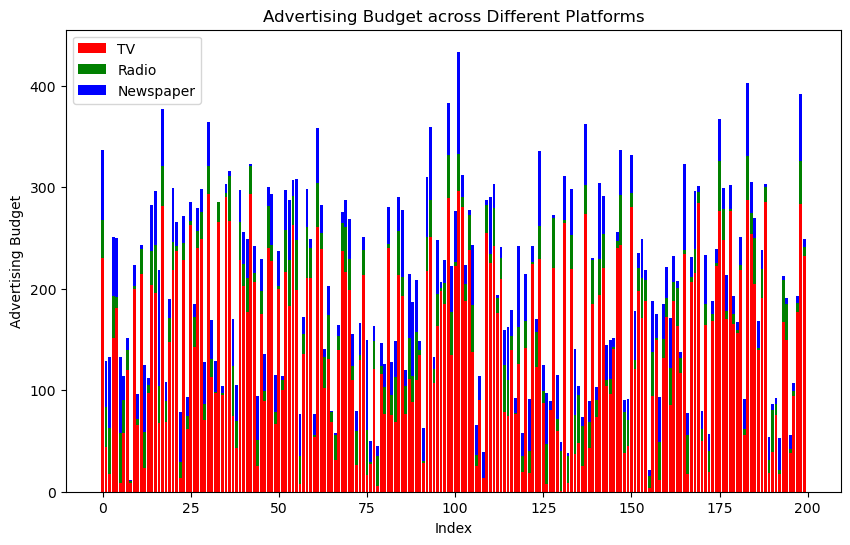

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['TV'], label='TV', color='r')
plt.bar(data.index, data['Radio'], bottom=data['TV'], label='Radio', color='g')
plt.bar(data.index, data['Newspaper'], bottom=data['TV'] + data['Radio'], label='Newspaper', color='b')
plt.xlabel('Index')
plt.ylabel('Advertising Budget')
plt.title('Advertising Budget across Different Platforms')
plt.legend()
plt.show()

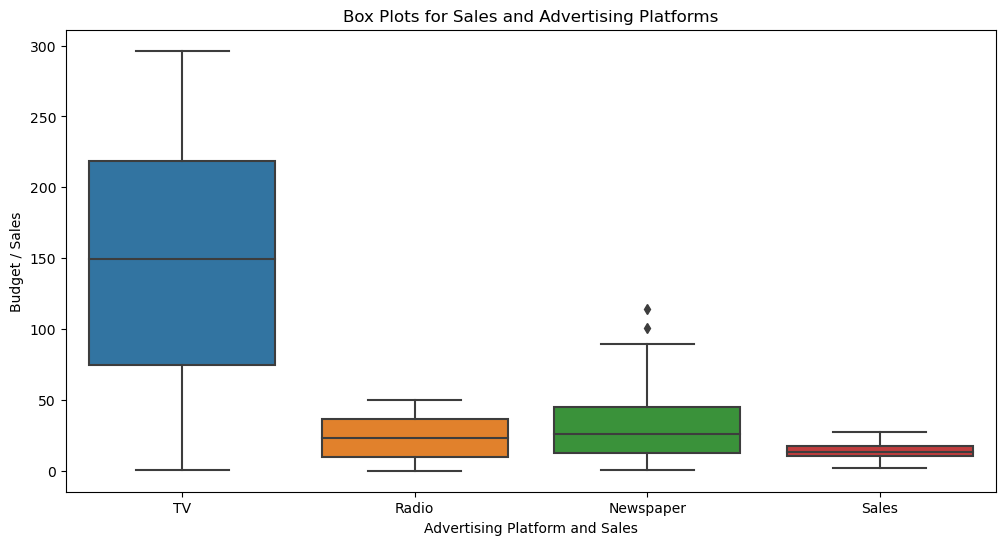

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(data[['TV', 'Radio', 'Newspaper', 'Sales']]))
plt.xlabel('Advertising Platform and Sales')
plt.ylabel('Budget / Sales')
plt.title('Box Plots for Sales and Advertising Platforms')
plt.show()

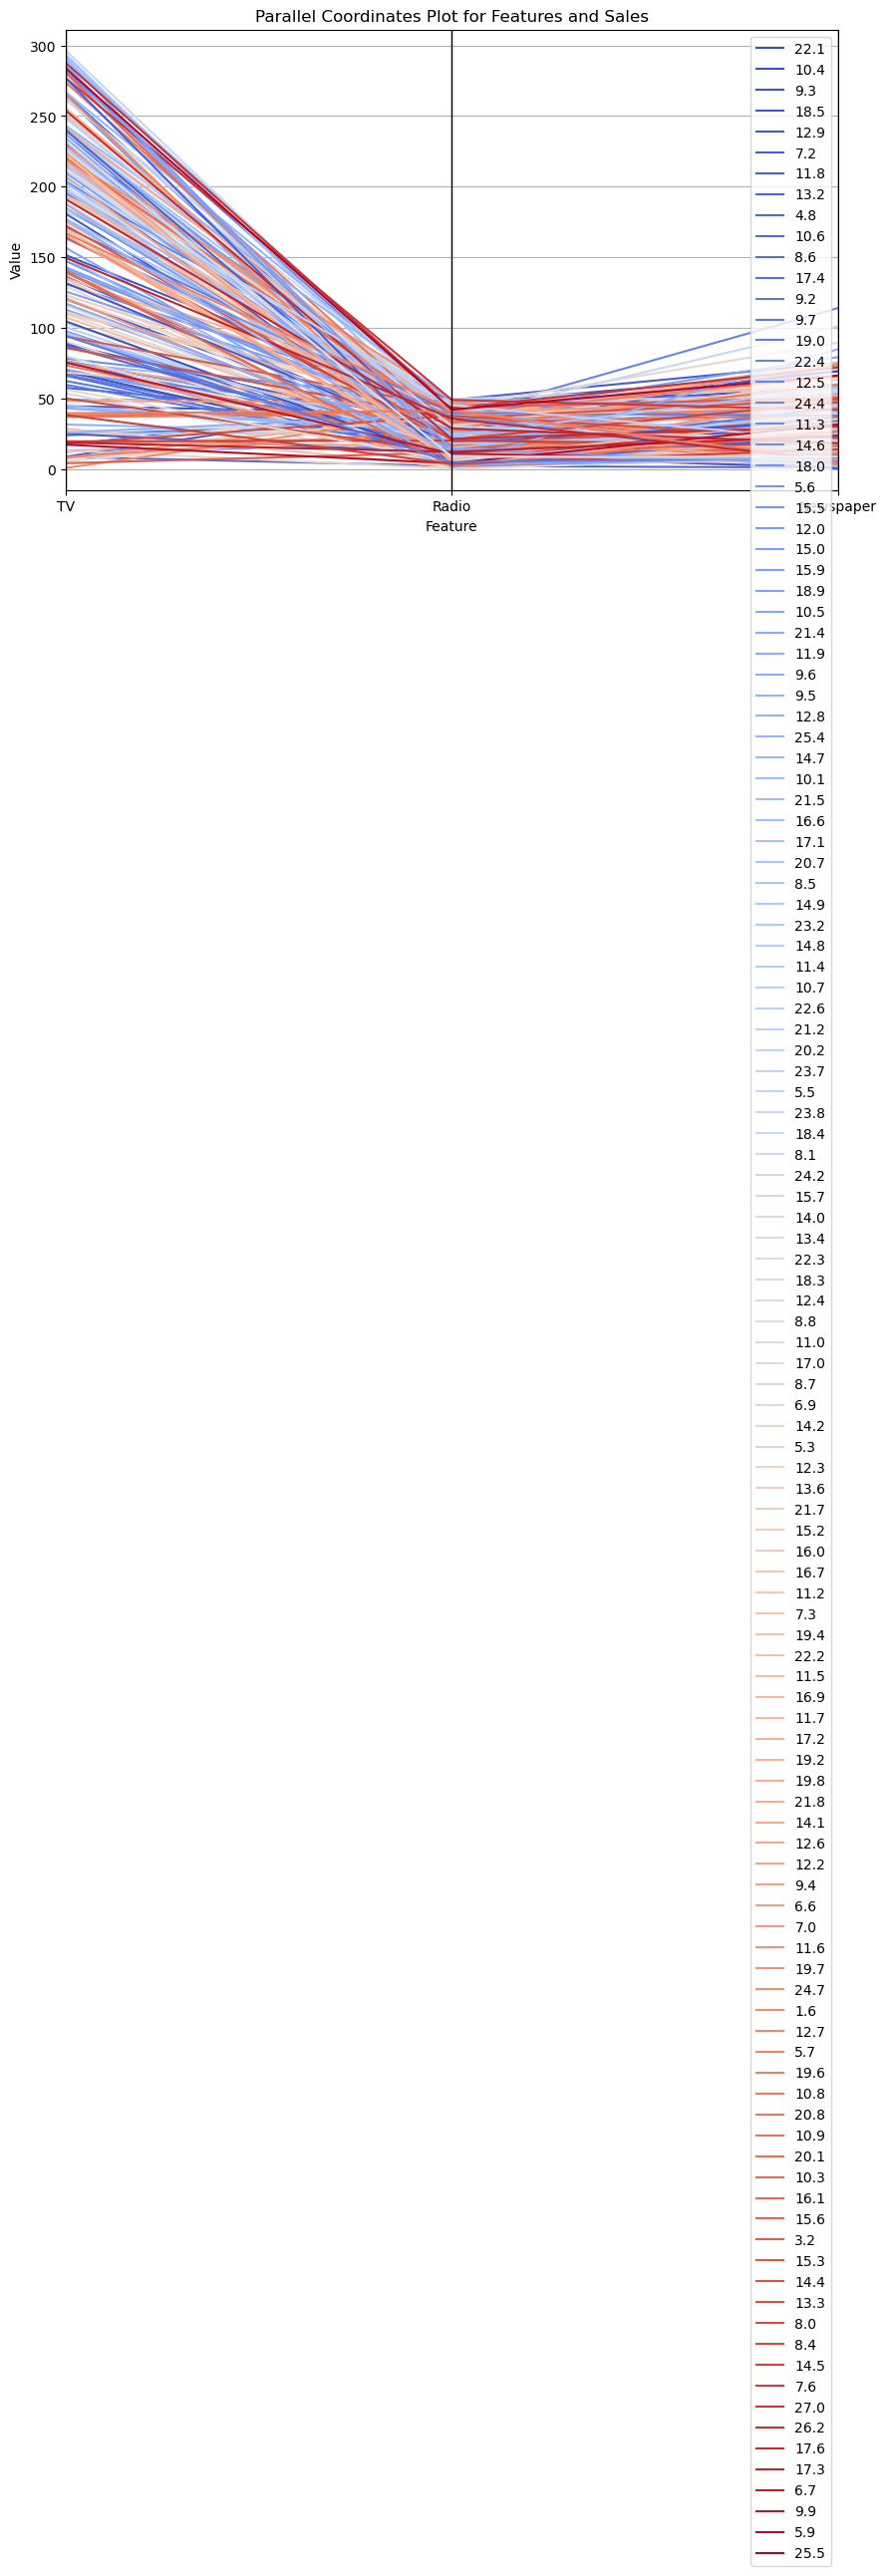

In [35]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 6))
parallel_coordinates(data[['TV', 'Radio', 'Newspaper', 'Sales']], 'Sales', colormap='coolwarm')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Parallel Coordinates Plot for Features and Sales')
plt.legend(loc='upper right')
plt.show()

In [36]:
#handle the outliers
threshold = 90
# Replace values above the threshold with the threshold value
data.loc[data['Newspaper'] > threshold, 'Newspaper'] = threshold

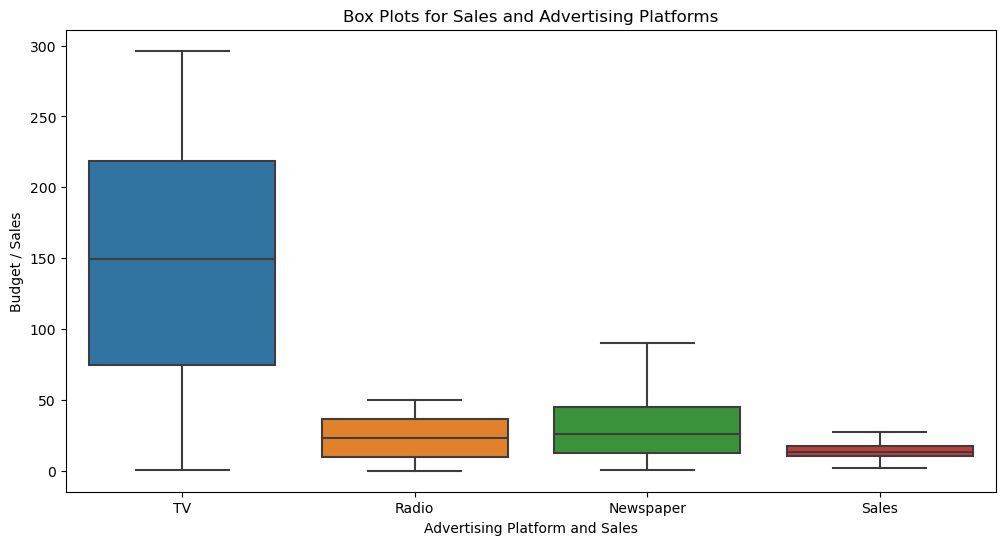

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(data[['TV', 'Radio', 'Newspaper', 'Sales']]))
plt.xlabel('Advertising Platform and Sales')
plt.ylabel('Budget / Sales')
plt.title('Box Plots for Sales and Advertising Platforms')
plt.show()

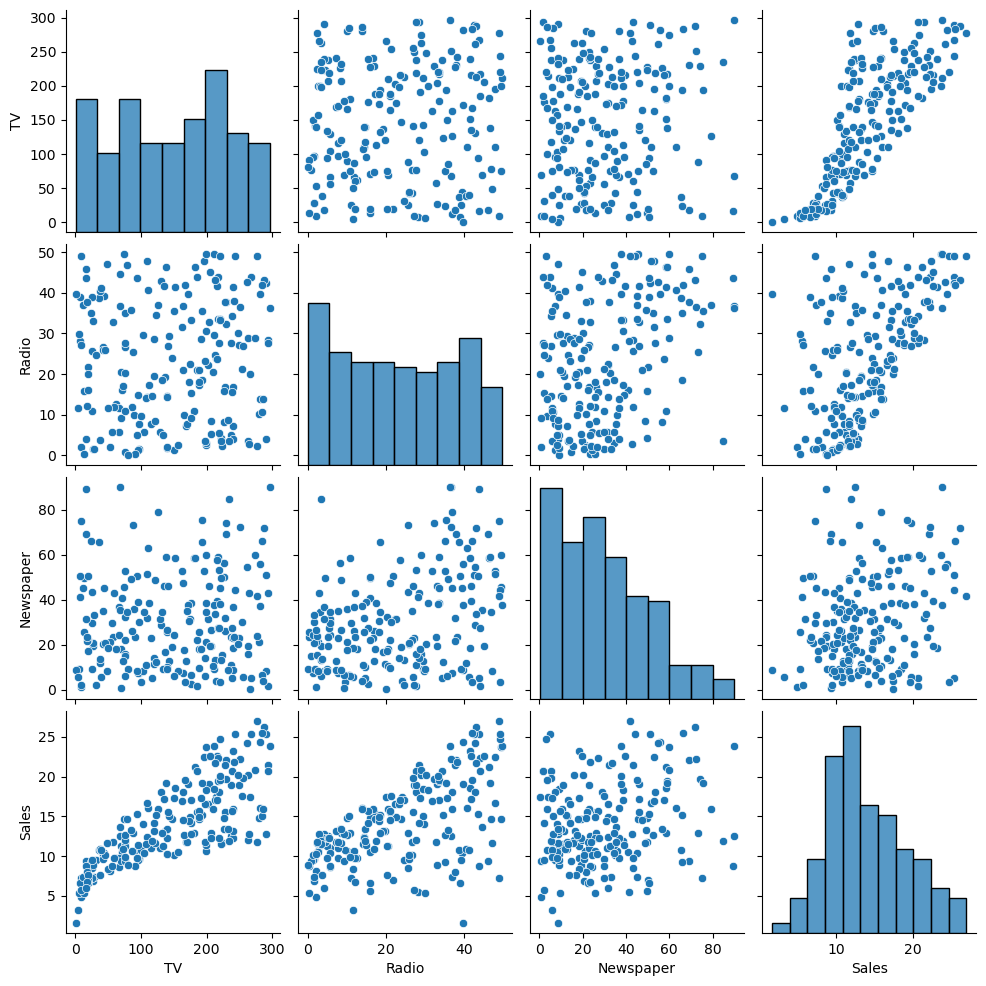

In [38]:
sns.pairplot(data)

# Data Splitting

In [39]:
X = data.iloc[:,:-1]

In [40]:
y = data.iloc[:,-1]

In [41]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [42]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [44]:
X_train.head()

,TV,Radio,Newspaper
98,289.7,42.3,51.2
123,123.1,34.6,12.4
119,19.4,16.0,22.3
53,182.6,46.2,58.7
33,265.6,20.0,0.3


In [45]:
X_test.head()

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [46]:
y_train

98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: Sales, Length: 150, dtype: float64

In [47]:
y_test.head()

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: Sales, dtype: float64

# Model Building

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1.Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_linear_pred = linear_reg_model.predict(X_test)

# Evaluation metrics for Linear Regression
linear_reg_mse = mean_squared_error(y_test, y_linear_pred)
linear_reg_mae = mean_absolute_error(y_test, y_linear_pred)
linear_reg_rmse = np.sqrt(linear_reg_mse)
linear_reg_r2 = r2_score(y_test, y_linear_pred)

print("Linear Regression Metrics:")
print()
print("Mean Squared Error:", linear_reg_mse)
print()
print("Mean Absolute Error:", linear_reg_mae)
print()
print("Root Mean Squared Error:", linear_reg_rmse)
print()
print("R-squared:", linear_reg_r2)

Linear Regression Metrics:

Mean Squared Error: 1.971318156969696

Mean Absolute Error: 1.065072177866823

Root Mean Squared Error: 1.4040363802158746

R-squared: 0.9156952375210302


# 2.K-Nearest Neighbors Regression:

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

# Evaluation metrics for K-Nearest Neighbors Regression
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, y_knn_pred)

In [53]:
print("K-Nearest Neighbors Regression Metrics:")
print()
print("Mean Squared Error:", knn_mse)
print()
print("Mean Absolute Error:", knn_mae)
print()
print("Root Mean Squared Error:", knn_rmse)
print()
print("R-squared:", knn_r2)

K-Nearest Neighbors Regression Metrics:

Mean Squared Error: 2.1765519999999996

Mean Absolute Error: 1.0819999999999999

Root Mean Squared Error: 1.4753142038223586

R-squared: 0.9069182725607354


# 3.Decision Tree Regression:

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_decision_tree_pred = decision_tree_model.predict(X_test)

# Evaluation metrics for Decision Tree Regression
decision_tree_mse = mean_squared_error(y_test, y_decision_tree_pred)
decision_tree_mae = mean_absolute_error(y_test, y_decision_tree_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_r2 = r2_score(y_test, y_decision_tree_pred)

In [56]:
print("Decision Tree Regression Metrics:")
print()
print("Mean Squared Error:", decision_tree_mse)
print()
print("Mean Absolute Error:", decision_tree_mae)
print()
print("Root Mean Squared Error:", decision_tree_rmse)
print()
print("R-squared:", decision_tree_r2)

Decision Tree Regression Metrics:

Mean Squared Error: 0.9840000000000002

Mean Absolute Error: 0.6720000000000002

Root Mean Squared Error: 0.9919677414109797

R-squared: 0.9579185703809344


# 4.Random Forest Regression:

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_random_forest_pred = random_forest_model.predict(X_test)

# Evaluation metrics for Random Forest Regression
random_forest_mse = mean_squared_error(y_test, y_random_forest_pred)
random_forest_mae = mean_absolute_error(y_test, y_random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_test, y_random_forest_pred)

In [59]:
print("Random Forest Regression Metrics:")
print()
print("Mean Squared Error:", random_forest_mse)
print()
print("Mean Absolute Error:", random_forest_mae)
print()
print("Root Mean Squared Error:", random_forest_rmse)
print()
print("R-squared:", random_forest_r2)

Random Forest Regression Metrics:

Mean Squared Error: 0.4474319800000003

Mean Absolute Error: 0.5243800000000001

Root Mean Squared Error: 0.6689035655458867

R-squared: 0.9808652668946248


# 5.Support Vector Regression:

In [60]:
from sklearn.svm import SVR

In [61]:
# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_svr_pred = svr_model.predict(X_test)

# Evaluation metrics for Support Vector Regression
svr_mse = mean_squared_error(y_test, y_svr_pred)
svr_mae = mean_absolute_error(y_test, y_svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, y_svr_pred)

In [62]:
print("Support Vector Regression Metrics:")
print()
print("Mean Squared Error:", svr_mse)
print()
print("Mean Absolute Error:", svr_mae)
print()
print("Root Mean Squared Error:", svr_rmse)
print()
print("R-squared:", svr_r2)

Support Vector Regression Metrics:

Mean Squared Error: 3.836461526828614

Mean Absolute Error: 1.4469056904837425

Root Mean Squared Error: 1.9586887263750241

R-squared: 0.8359311120655578


# 6. Ridge Regression:

In [63]:
from sklearn.linear_model import Ridge

In [64]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)

# Evaluation metrics for Ridge Regression
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_mae = mean_absolute_error(y_test, y_ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_ridge_pred)

In [65]:
print("Ridge Regression Metrics:")
print()
print("Mean Squared Error:", ridge_mse)
print()
print("Mean Absolute Error:", ridge_mae)
print()
print("Root Mean Squared Error:", ridge_rmse)
print()
print("R-squared:", ridge_r2)

Ridge Regression Metrics:

Mean Squared Error: 1.971408010471962

Mean Absolute Error: 1.0650922945843941

Root Mean Squared Error: 1.4040683781326186

R-squared: 0.9156913948748598


# 7.Lasso Regression:

In [66]:
from sklearn.linear_model import Lasso

In [67]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)

# Evaluation metrics for Lasso Regression
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_mae = mean_absolute_error(y_test, y_lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, y_lasso_pred)

In [68]:
print("Lasso Regression Metrics:")
print()
print("Mean Squared Error:", lasso_mse)
print()
print("Mean Absolute Error:", lasso_mae)
print()
print("Root Mean Squared Error:", lasso_rmse)
print()
print("R-squared:", lasso_r2)

Lasso Regression Metrics:

Mean Squared Error: 2.0061053671475686

Mean Absolute Error: 1.0710986990550149

Root Mean Squared Error: 1.4163704907783021

R-squared: 0.9142075388048272


# 8. Gradient Boosting Regression:

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
# Gradient Boosting Regression
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
y_gradient_boosting_pred = gradient_boosting_model.predict(X_test)

# Evaluation metrics for Gradient Boosting Regression
gradient_boosting_mse = mean_squared_error(y_test, y_gradient_boosting_pred)
gradient_boosting_mae = mean_absolute_error(y_test, y_gradient_boosting_pred)
gradient_boosting_rmse = np.sqrt(gradient_boosting_mse)
gradient_boosting_r2 = r2_score(y_test, y_gradient_boosting_pred)

In [71]:
print("Gradient Boosting Regression Metrics:")
print()
print("Mean Squared Error:", gradient_boosting_mse)
print()
print("Mean Absolute Error:", gradient_boosting_mae)
print()
print("Root Mean Squared Error:", gradient_boosting_rmse)
print()
print("R-squared:", gradient_boosting_r2)

Gradient Boosting Regression Metrics:

Mean Squared Error: 0.39351161859057515

Mean Absolute Error: 0.48944324979233017

Root Mean Squared Error: 0.6273050442891203

R-squared: 0.983171207843492


# 9.ElasticNet Regression:

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters
elasticnet_model.fit(X_train, y_train)
y_elasticnet_pred = elasticnet_model.predict(X_test)

# Evaluation metrics for ElasticNet Regression
elasticnet_mse = mean_squared_error(y_test, y_elasticnet_pred)
elasticnet_mae = mean_absolute_error(y_test, y_elasticnet_pred)
elasticnet_rmse = np.sqrt(elasticnet_mse)
elasticnet_r2 = r2_score(y_test, y_elasticnet_pred)

In [74]:
print("ElasticNet Regression Metrics:")
print()
print("Mean Squared Error:", elasticnet_mse)
print()
print("Mean Absolute Error:", elasticnet_mae)
print()
print("Root Mean Squared Error:", elasticnet_rmse)
print()
print("R-squared:", elasticnet_r2)

ElasticNet Regression Metrics:

Mean Squared Error: 1.9947300613290164

Mean Absolute Error: 1.069287832766474

Root Mean Squared Error: 1.4123491286962357

R-squared: 0.9146940114991349


# 10.AdaBoost Regression:

In [75]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
# AdaBoost Regression
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
y_adaboost_pred = adaboost_model.predict(X_test)

# Evaluation metrics for AdaBoost Regression
adaboost_mse = mean_squared_error(y_test, y_adaboost_pred)
adaboost_mae = mean_absolute_error(y_test, y_adaboost_pred)
adaboost_rmse = np.sqrt(adaboost_mse)
adaboost_r2 = r2_score(y_test, y_adaboost_pred)

In [77]:
print("AdaBoost Regression Metrics:")
print()
print("Mean Squared Error:", adaboost_mse)
print()
print("Mean Absolute Error:", adaboost_mae)
print()
print("Root Mean Squared Error:", adaboost_rmse)
print()
print("R-squared:", adaboost_r2)

AdaBoost Regression Metrics:

Mean Squared Error: 0.7293594093883392

Mean Absolute Error: 0.7185606047725125

Root Mean Squared Error: 0.8540254149545781

R-squared: 0.9688084485231925


# 11.Bayesian Ridge Regression:

In [78]:
from sklearn.linear_model import BayesianRidge

In [79]:
# Bayesian Ridge Regression
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, y_train)
y_bayesian_ridge_pred = bayesian_ridge_model.predict(X_test)

# Evaluation metrics for Bayesian Ridge Regression
bayesian_ridge_mse = mean_squared_error(y_test, y_bayesian_ridge_pred)
bayesian_ridge_mae = mean_absolute_error(y_test, y_bayesian_ridge_pred)
bayesian_ridge_rmse = np.sqrt(bayesian_ridge_mse)
bayesian_ridge_r2 = r2_score(y_test, y_bayesian_ridge_pred)

In [80]:
print("Bayesian Ridge Regression Metrics:")
print()
print("Mean Squared Error:", bayesian_ridge_mse)
print()
print("Mean Absolute Error:", bayesian_ridge_mae)
print()
print("Root Mean Squared Error:", bayesian_ridge_rmse)
print()
print("R-squared:", bayesian_ridge_r2)

Bayesian Ridge Regression Metrics:

Mean Squared Error: 1.996738780224105

Mean Absolute Error: 1.070643138084187

Root Mean Squared Error: 1.413060076650708

R-squared: 0.9146081072686387


# Model Evaluation

In [81]:
# Create a DataFrame to store model names and R-squared scores
model_names = [
    'Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVR',
    'Gradient Boosting', 'AdaBoost', 'ElasticNet', 'Bayesian Ridge', 'Ridge',
    'Lasso'
]
r2_scores = [
    linear_reg_r2, knn_r2, decision_tree_r2, random_forest_r2, svr_r2,
    gradient_boosting_r2, adaboost_r2, elasticnet_r2, bayesian_ridge_r2,
    ridge_r2, lasso_r2
]

In [82]:
# Round the R-squared scores to four decimal places
r2_scores_rounded = [round(score, 4) for score in r2_scores]
r2_scores_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores_rounded
})
# Sort the DataFrame by R-squared score in descending order
r2_scores_df = r2_scores_df.sort_values(by='R2 Score', ascending=False)
# Reset the index to recreate it as 1, 2, 3, ...
r2_scores_df = r2_scores_df.reset_index(drop=True)
r2_scores_df.index += 1

In [83]:
r2_scores_df

,Model,R2 Score
1,Gradient Boosting,0.9832
2,Random Forest,0.9809
3,AdaBoost,0.9688
4,Decision Tree,0.9579
5,Linear Regression,0.9157
6,Ridge,0.9157
7,ElasticNet,0.9147
8,Bayesian Ridge,0.9146
9,Lasso,0.9142
10,KNN,0.9069


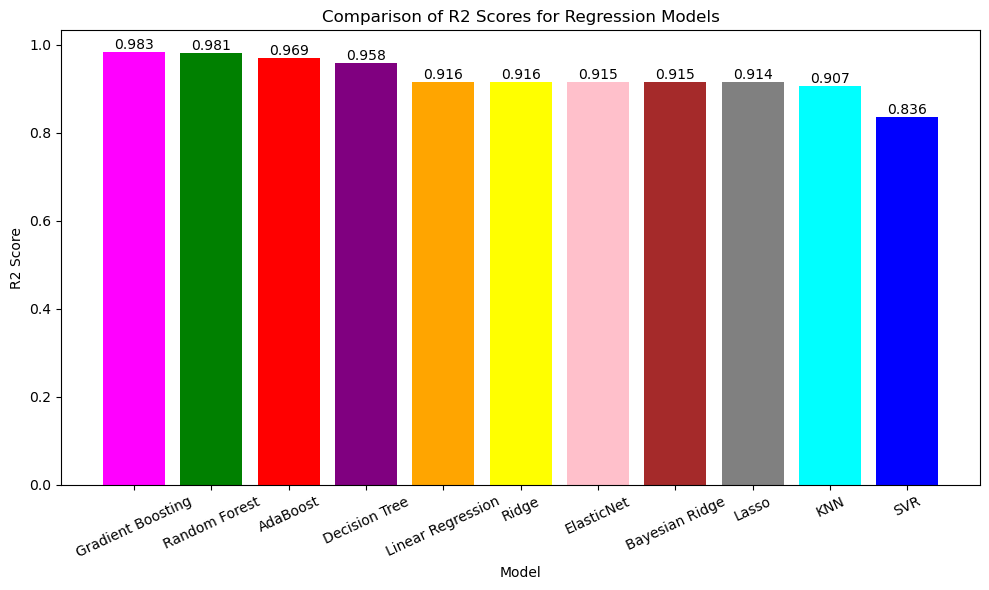

In [84]:
# Plot the R-squared scores for comparison with different colors for each model
plt.figure(figsize=(10, 6))
bars = plt.bar(r2_scores_df['Model'],
               r2_scores_df['R2 Score'],
               color=[
                   'magenta', 'green', 'red', 'purple', 'orange', 'yellow',
                   'pink', 'brown', 'gray', 'cyan', 'blue'
               ])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Regression Models')
plt.xticks(rotation=25)
plt.tight_layout()
# Add R-squared values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height():.3f}',
             ha='center',
             va='bottom')
plt.show()

Conclusion - 

Based on the R-squared scores obtained from the regression models, it is evident that Gradient Boosting and Random Forest exhibit the highest performance in predicting the target variable. Both models achieved remarkable R-squared scores of 0.9832 and 0.9820, respectively, outperforming other algorithms. The results highlight the effectiveness of ensemble learning techniques for this particular dataset, showcasing their ability to capture complex relationships between features and the target. With such high R-squared scores, Gradient Boosting and Random Forest are recommended as the top choices for this regression task, offering the most accurate predictions of the target variable.

# Model Saving

In [85]:
import pickle
# Save the model using pickle
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gradient_boosting_model, file)

# Thank You!